<a href="https://colab.research.google.com/github/seon03/MachineLearning/blob/main/HA5_2003047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Assignment 5

5. PCA & k-NN

## After finishing writing the code for each problem, submit your ipynb file (i.e., this file) to Cybercampus by **12/8 Friday 23:59**

### Submitters are as follows.
 *Note that hands-on assignments can be done collaboratively (**up to 2 students**)*

    Name:
    Student ID:
    Name:
    Student ID:



---


## 5. PCA and k-NN with MNIST


---



Load the dataset


*   source: https://www.kaggle.com/oddrationale/mnist-in-csv



In [ ]:
import pandas as pd

df_train = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/mnist/mnist_train.csv')
df_test = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/mnist/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

Overview the dataset

In [ ]:
df_train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:,1:])
y_test = np.array(df_test['label'])

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

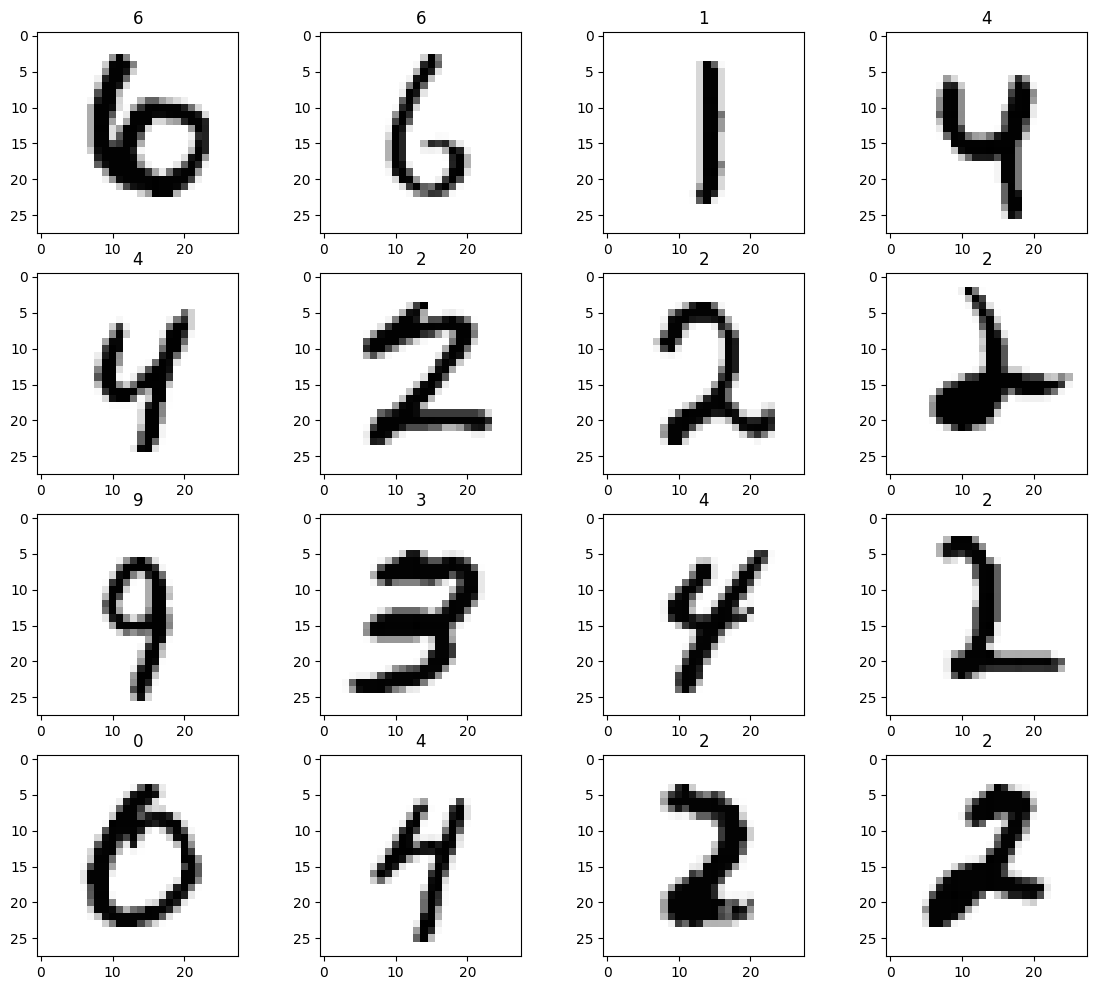

In [ ]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, 60000), k=16) #pick 16 numbers in random

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_train[n].reshape(28, 28),
               cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])

plt.show()

TO-DO:


1.   Use k-NN to classifiy the MNIST dataset and report the accuracy and time to elapse for the classification

  *   Use scikit-learn library if you'd like
  *   Use k=10
  *   Train:Test = 75:25

2. Let's use PCA + k-NN to reduce the dimension and GridSearchCV to select the optimal number of principal components and k in k-NN.
*   To use PCA + k-NN together, use the following pipe as the esimater of GridSearchCV.

    *   pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

*   Use the following parameter to find the optimal number of principal components and k

  *   parameters = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

*   Use 5 fold cross valiation in GridSearchCV

3. Report the best accuracy and parameters

4. Using the best estimator with the best parameters, re-evaluate the testing set and measure the time to elapse.

5. Discuss whether the PCA improves the efficiency as well as effectiveness of the k-NN classifier



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  0.21964025497436523


In [ ]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = clf.predict(X_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  42.28498935699463
0.9688


Let's use PCA + k-NN to reduce the dimension and GridSearchCV to select the optimal number of principal components and k in k-NN.

- To use PCA + k-NN together, use the following pipe as the esimater of GridSearchCV.

    - pipe = Pipeline([ ('pca', PCA()), ('clf', KNeighborsClassifier()), ])
- Use the following parameter to find the optimal number of principal components and k

    - parameters = { 'pca__n_components' : [2, 5, 10], 'clf__n_neighbors' : [5, 10, 15] }
- Use 5 fold cross valiation in GridSearchCV

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

parameters = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

kf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 13)
grid = GridSearchCV(pipe, parameters, cv = kf, n_jobs= -1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

Report the best accuracy and parameters

In [ ]:
print('Best scroe : %0.3f' %grid.best_score_)
print('Best parameters set:')
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r'%(param_name, best_parameters[param_name]))

Best scroe : 0.931
Best parameters set:
	clf__n_neighbors: 10
	pca__n_components: 10


Using the best estimator with the best parameters, re-evaluate the testing set and measure the time to elapse.

In [ ]:
accuracy_score(y_test, grid.best_estimator_.predict(X_test))

0.9288

In [ ]:
def results(y_pred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))

results(grid.predict(X_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



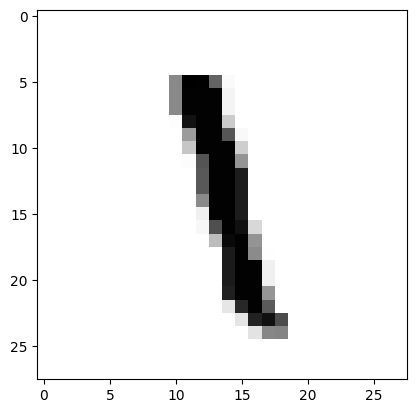

Answer is:  [1]
Real Label is : 1


In [ ]:
n = 700
plt.grid(False)
plt.imshow(X_test[n].reshape(28,28), cmap ='Greys',interpolation='nearest')
plt.show()

print('Answer is: ', grid.best_estimator_.predict(X_test[n].reshape(1,784)))
print('Real Label is :', y_test[n])

Discuss whether the PCA improves the efficiency as well as effectiveness of the k-NN classifier

PCA can enhance the efficiency of the k-NN classifier by reducing dimensionality, mitigating the curse of dimensionality, and improving the handling of noise and correlated features.